## This file contains a function for plotting best features after feature selections 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

#from sklearn.feature_selection import VarianceTreshold
from sklearn.feature_selection import SelectKBest,mutual_info_classif
from sklearn.model_selection import train_test_split

In [17]:
feature_data = "feature_data.csv"
feature_df = pd.read_csv(feature_data)
metadata = "metadata.csv"
df = pd.read_csv(metadata)

In [18]:
file_data = 'metadata_withmasks.csv'
image_folder = 'test_images' + os.sep
mask_folder = 'test_images_masks' + os.sep
file_features = 'feature_data.csv'

In [19]:
# Extract image ids and labels
df = pd.read_csv(file_data)

# Remove images without masks
df_mask = df['mask'] == 1
df = df.loc[df_mask]

labels = list(df['diagnostic'])

In [20]:
feature_names = ['mean_assymmetry', 'best_asymmetry', 'worst_asymmetry', 'red_var', 'green_var', 'blue_var', \
     'hue_var', 'sat_var', 'val_var', 'dom_hue', 'dom_sat', 'dom_val', \
     'compactness', 'area', 'perimeter', 'convexity', 'F1', 'F2', 'F3', 'F10', 'F11', 'F12']

In [21]:
X_train , X_test, y_train, y_test = train_test_split(feature_df[feature_names], labels, test_size = 0.30, random_state = 42)

[0.0645078  0.10506579 0.02357488 0.01871619 0.05707556 0.06730597
 0.08232561 0.01166744 0.03855621 0.14792321 0.         0.03534946
 0.14113426 0.07500418 0.10486456 0.18131007 0.0859727  0.1519883
 0.03690792 0.24910727 0.20525464 0.1753872 ]


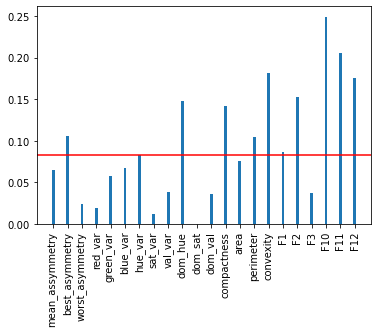

In [34]:
def feature_scores(train_X, train_y, k):
    '''Using SelectKBest to extract features from train_X, down to k features as output
    Returns a selector object (which is applied to X_train and X_test afterwards) 
	and the score for each feature.

    Args:
        train_X (pandas.DataFrame): Data Frame of features from X_train.
		train_y (pandas.DataFrame): Data Frame of target values from y_train.
        k (int): Number of features to output.

    Returns:
		feature_selector (selector object): 
        scores (numpy.ndarray): Array containg scores for each feature.    
    '''
    feature_selector = SelectKBest(mutual_info_classif, k=k)
    feature_selector.fit_transform(train_X, train_y)
    
    scores = feature_selector.scores_
    
    return feature_selector, scores

selector, scores = feature_scores(X_train, y_train, 10)

print(selector.scores_)
threshold = np.sort(selector.scores_)[::-1][10]

def plot_feature_scores(scores, X_train):
    # Get no. of features
    features = len(scores)

    # Visualize feature scores
    plt.bar(np.arange(0,features), scores, width=.2)
    plt.xticks(np.arange(0,features), list(X_train.columns), rotation='vertical')
    plt.axhline(y=threshold, color='r')
    plt.show()

plot_feature_scores(scores, X_train)
